In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, BatchNormalization, Dropout
from keras.datasets import mnist

In [3]:
(X_train, y_train),((x_test,y_test))= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:

model=Sequential()


model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
histroy=model.fit(X_train, y_train, epochs=10, batch_size=64 , validation_data=(x_test, y_test))

Epoch 1/10
938/938 [==============================] - 9s 8ms/step - loss: 3.7905 - accuracy: 0.8669 - val_loss: 0.7019 - val_accuracy: 0.8833
Epoch 2/10
938/938 [==============================] - 7s 7ms/step - loss: 0.4870 - accuracy: 0.9090 - val_loss: 0.4142 - val_accuracy: 0.9165
Epoch 3/10
938/938 [==============================] - 6s 6ms/step - loss: 0.3019 - accuracy: 0.9303 - val_loss: 0.3857 - val_accuracy: 0.9197
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.2420 - accuracy: 0.9400 - val_loss: 0.3010 - val_accuracy: 0.9328
Epoch 5/10
938/938 [==============================] - 5s 5ms/step - loss: 0.2076 - accuracy: 0.9467 - val_loss: 0.2757 - val_accuracy: 0.9438
Epoch 6/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1937 - accuracy: 0.9505 - val_loss: 0.2778 - val_accuracy: 0.9425
Epoch 7/10
938/938 [==============================] - 9s 9ms/step - loss: 0.1782 - accuracy: 0.9531 - val_loss: 0.2536 - val_accuracy: 0.9459
Epoch 

In [7]:
loss = model.evaluate(x_test, y_test, verbose=0)
loss

[0.21773315966129303, 0.9526000022888184]

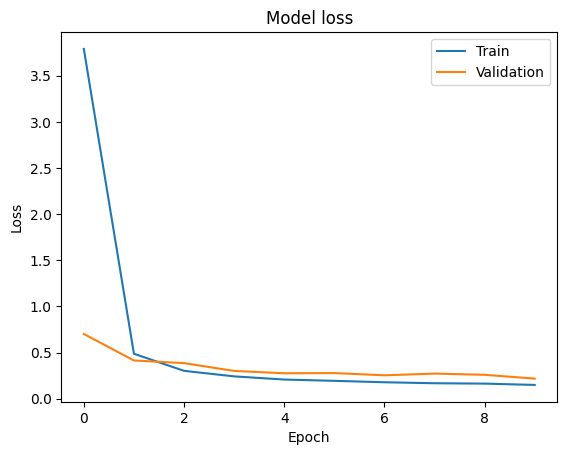

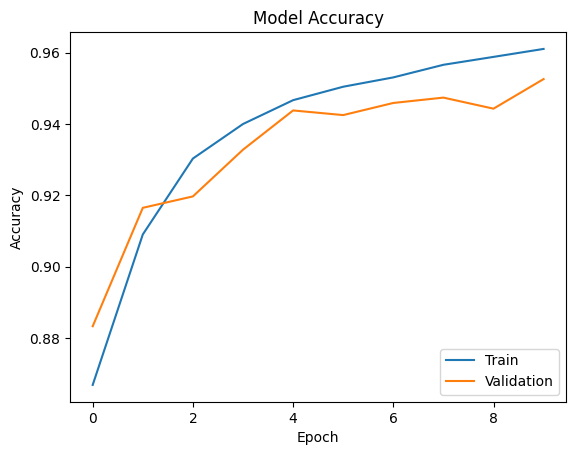

In [8]:
import matplotlib.pyplot as plt
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the accuracy of training and validation

# Plotting the training and validation accuracy
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [18]:

predictions = model.predict(x_test)
predicted_class = np.argmax(predictions[9])

actual_class = y_test[9]

print("Predicted Class:", predicted_class)
print("Actual Class:", actual_class)


313/313 [==============================] - 1s 2ms/step
Predicted Class: 9
Actual Class: 9


In [19]:

y_pred=[np.argmax(i) for i in predictions]
print("Predicted : ",y_pred[:5])
print("Actual    : ",y_test[:5])

Predicted :  [7, 2, 1, 0, 4]
Actual    :  [7 2 1 0 4]


(-0.5, 27.5, 27.5, -0.5)

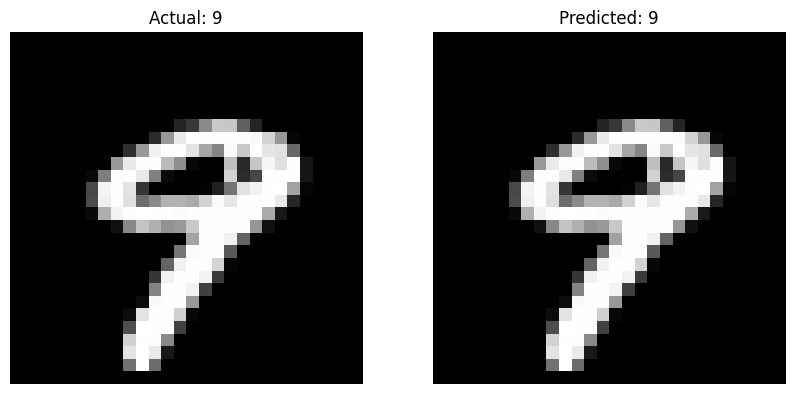

In [21]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(x_test[9].reshape(28, 28), cmap='gray')
plt.title(f"Actual: {actual_class}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[9].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
